### Preamble

In [1]:
from qiskit import Aer
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np
from qiskit import *
%matplotlib inline
import scipy.linalg as la
import math
import warnings
from qiskit.circuit.library.standard_gates import (HGate, RYGate, RZGate, XGate, ZGate, U1Gate, IGate)
from qiskit.tools.visualization import plot_histogram

import qiskit.circuit.library.standard_gates
from qiskit.converters import circuit_to_instruction
from qiskit.extensions import UnitaryGate

In [2]:
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%10.4f" % x))

In [3]:
%%html
<style>
#notebook-container {
    width: 100%;
    background-color: #EEE
}

.code_cell {
   flex-direction: column !important;
}

.code_cell .output_wrapper {
    width: 100%;
    background-color: #FFF
}

.code_cell .input {
    width: 100%;
    background-color: #FFF
}
</style>
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [4]:
%%javascript

window.scroll_flag = true
window.scroll_exit = false
window.scroll_delay = 100

$(".output_scroll").each(function() {
    $(this)[0].scrollTop = $(this)[0].scrollHeight;
});

function callScrollToBottom() {
    setTimeout(scrollToBottom, window.scroll_delay);
}

function scrollToBottom() {
    if (window.scroll_exit) {
        return;
    }
    if (!window.scroll_flag) {
        callScrollToBottom();
        return;
    };
    
    $(".output_scroll").each(function() {
        if (!$(this).attr('scroll_checkbox')){
            window.scroll_flag = true;
            $(this).attr('scroll_checkbox',true);
            var div = document.createElement('div');
            var checkbox = document.createElement('input');
            checkbox.type = "checkbox";
            checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
            checkbox.checked = "checked"
            div.append("Auto-Scroll-To-Bottom: ");
            div.append(checkbox);
            $(this).parent().before(div);
        }
        
        $(this)[0].scrollTop = $(this)[0].scrollHeight;
    });
    callScrollToBottom();
}
scrollToBottom();

<IPython.core.display.Javascript object>

# WHAT WE WANT

In [5]:
## ------------------------------------------------- 2021-01-19, (Previous) PERTURBED COIN UNITARY 
U1_phase_angle  =   1.5707963267948966 
U1_RZGate_phi   =   3.1415926535897931 
U1_RYGate_theta =   2.1208811557885126 
U1_RZGate_lamb  =   0.0000000000000000 
U2_phase_angle  =  -0.0000000000000000 
U2_RZGate_phi   =   3.1415926535897931 
U2_RYGate_theta =   1.9863951875382797 
U2_RZGate_lamb  =   3.1415926535897931 
MID_angle1      =   1.0877844350147556 
MID_angle2      =   0.1524284793158924 
V1_phase_angle  =   1.5707963267948966 
V1_RZGate_phi   =   3.1415926535897931 
V1_RYGate_theta =   2.6271333499550176 
V1_RZGate_lamb  =   0.0000000000000000 
V2_phase_angle  =   1.5707963267948966 
V2_RZGate_phi   =   3.1415926535897931 
V2_RYGate_theta =   0.5943894309337333 
V2_RZGate_lamb  =   0.0000000000000000 

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr) # Cannot have classical register for wrapping into custom_gate


alpha = MID_angle1
beta = MID_angle2

multiplex = UnitaryGate(np.array([[np.cos(MID_angle1), 0,                 -np.sin(MID_angle1), 0                  ],
                                  [0,                  np.cos(MID_angle2), 0,                  -np.sin(MID_angle2)],
                                  [np.sin(MID_angle1), 0,                  np.cos(MID_angle1), 0                  ],
                                  [0,                  np.sin(MID_angle2), 0,                   np.cos(MID_angle2)]]))
 
##############3# circ.ry(1.287002217587,0)# Rotate to get |sigma_2>
circ.crz(V2_RZGate_lamb,1,0)
circ.cry(V2_RYGate_theta,1,0)
circ.crz(V2_RZGate_phi,1,0)
circ.cu1(V2_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(V2_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)
circ.crz(V1_RZGate_lamb,1,0)
circ.cry(V1_RYGate_theta,1,0)
circ.crz(V1_RZGate_phi,1,0)
circ.cu1(V1_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(V1_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)
circ.unitary(multiplex, [0,1], label='GSVD MTPLX')
circ.crz(U2_RZGate_lamb,1,0)
circ.cry(U2_RYGate_theta,1,0)
circ.crz(U2_RZGate_phi,1,0)
circ.cu1(U2_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(U2_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)
circ.crz(U1_RZGate_lamb,1,0)
circ.cry(U1_RYGate_theta,1,0)
circ.crz(U1_RZGate_phi,1,0)
circ.cu1(U1_phase_angle,1,0)
circ.cx(1,0)
circ.cu1(U1_phase_angle,1,0)
circ.cx(1,0)
circ.x(1)


### Store these gates in custom_gate
custom_gate = circuit_to_instruction(circ)

# circ.measure(0,0)
# circ.measure(1,1)

# circ.draw(output='mpl')
circ.draw()
# circ.draw(output='mpl', interactive=False, filename='Perturbed_coin_20200902_0010.png')


/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_97227/525232959.py:38: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(V2_phase_angle,1,0)
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_97227/525232959.py:40: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(V2_phase_angle,1,0)
/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_97227/525232959.py:46: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circ.cu1(V1_phase_ang

┌───────┐┌─────────────┐┌───────┐          ┌───┐          ┌───┐     »
q0_0: ┤ Rz(0) ├┤ Ry(0.59439) ├┤ Rz(π) ├─■────────┤ X ├─■────────┤ X ├─────»
      └───┬───┘└──────┬──────┘└───┬───┘ │U1(π/2) └─┬─┘ │U1(π/2) └─┬─┘┌───┐»
q0_1: ────■───────────■───────────■─────■──────────■───■──────────■──┤ X ├»
                                                                     └───┘»
«      ┌───────┐┌────────────┐┌───────┐          ┌───┐          ┌───┐     »
«q0_0: ┤ Rz(0) ├┤ Ry(2.6271) ├┤ Rz(π) ├─■────────┤ X ├─■────────┤ X ├─────»
«      └───┬───┘└─────┬──────┘└───┬───┘ │U1(π/2) └─┬─┘ │U1(π/2) └─┬─┘┌───┐»
«q0_1: ────■──────────■───────────■─────■──────────■───■──────────■──┤ X ├»
«                                                                    └───┘»
«      ┌─────────────┐┌───────┐┌────────────┐┌───────┐        ┌───┐        »
«q0_0: ┤0            ├┤ Rz(π) ├┤ Ry(1.9864) ├┤ Rz(π) ├─■──────┤ X ├─■──────»
«      │  GSVD MTPLX │└───┬───┘└─────┬──────┘└───┬───┘ │U1(0) └─┬─┘ │U1(0) »
«q0_1: ┤1            ├────■──────────■───────────■─────■────────■───■──────»
«      └─────────────┘                                                     »
«      ┌───┐     ┌───────┐┌────────────┐┌───────┐          ┌───┐          ┌───┐»
«q0_0: ┤ X ├─────┤ Rz(0) ├┤ Ry(2.1209) ├┤ Rz(π) ├─■────────┤ X ├─■────────┤ X ├»
«      └─┬─┘┌───┐└───┬───┘└─────┬──────┘└───┬───┘ │U1(π/2) └─┬─┘ │U1(π/2) └─┬─┘»
«q0_1: ──■──┤ X ├────■──────────■───────────■─────■──────────■───■──────────■──»
«           └───┘                                                              »
«           
«q0_0: ─────
«      ┌───┐
«q0_1: ┤ X ├
«      └───┘

In [6]:
from qiskit.quantum_info import Operator

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr)
circ.append(custom_gate,[0,1]) # Single custom_gate

mat = Operator(circ)
unitary = mat.data

# print('Real: \n')
print(np.real(np.around(unitary,4)))
print('\n')
# print('Imag: \n')
print(np.imag(np.around(unitary,4)))

[[    0.8918    -0.0000    -0.4524     0.0000]
 [    0.3638     0.5148     0.7172    -0.2972]
 [    0.0000     0.5000     0.0000     0.8660]
 [    0.2689    -0.6964     0.5301     0.4021]]


[[   -0.0000    -0.0000     0.0000     0.0000]
 [   -0.0000    -0.0000    -0.0000     0.0000]
 [   -0.0000     0.0000    -0.0000    -0.0000]
 [   -0.0000    -0.0000    -0.0000    -0.0000]]


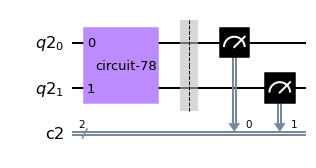

In [7]:
timesteps = 1
qr = QuantumRegister(timesteps+1)
cr = ClassicalRegister(timesteps+1)
circ = QuantumCircuit(qr,cr)
for i in range(0,timesteps):
    circ.append(custom_gate,[timesteps-i-1,timesteps])

circ.barrier()
for i in range(0,timesteps+1):
    circ.measure(i,i)


# circ.measure(0,0)
# circ.measure(1,1)

# circ.measure(timesteps,timesteps)

circ.draw(output='mpl')

## IDEAL -- save data for histogram

In [8]:
job = execute([circ],
              Aer.get_backend('qasm_simulator'), shots = 1000000)
results = job.result()
counts = results.get_counts()
fig = plot_histogram(counts, figsize=[6,3],title = 'Without noise')

# print('Done')

/opt/miniconda3/envs/qiskit-37/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/qiskit-37/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


# ibmq_manila

In [9]:
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ

IBMQ.save_account('d1c6ff343b14365b86172d0503f484880269543b4d365f4107e80009f3768f4bb8d5275afe8da21502d921b53b6091222f7a4390eac1fe846a79900110c64e0a', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-research')

provider.backends()

### Extract from backend
# Build noise model from backend properties
bknd = 'ibmq_manila'

backend = provider.get_backend(bknd)
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

### Extract from backend -- specific date
# Specifying a date: YYYY, MM, DD
from datetime import datetime, date
# mo = datetime(2020, 12, 12) # <-- Date of generating 61696 basis states files.
mo = datetime(2022, 9, 25)

# How to access properties of a specific date
real_backend = provider.backends.ibmq_manila
prop = real_backend.properties(datetime=mo)
print(prop.last_update_date)

### View noise model
# How to access properties of a specific date
real_backend = provider.backends.ibmq_manila
prop = real_backend.properties(datetime=mo)
print(prop.last_update_date)

# To see the details of the noise model
# noise_model.to_dict()

/var/folders/r0/2c5gd4913hnc2d8nmnjflkj80000gn/T/ipykernel_97227/2998694745.py:33: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  real_backend = provider.backends.ibmq_manila


2022-09-24 23:09:40+08:00
2022-09-24 23:09:40+08:00


# Noisy

In [10]:
job = execute([circ],
              Aer.get_backend('qasm_simulator'),
              noise_model = noise_model,
              basis_gates = basis_gates,
              shots = 1000000)
results = job.result()
counts = results.get_counts()
fig = plot_histogram(counts, figsize=[6,3],title = 'Without noise')

# print('Done')

### 13 BASIS STATES (SINGLE QUBIT)

In [11]:
BasisStates_169 = [[[1,0],[0,1]],
               
               [[0,1],[1,0]],
               [[0,-1j],[1j,0]],
               [[1,0],[0,-1]],

               [[1/np.sqrt(2)*1,1/np.sqrt(2)*1j],[1/np.sqrt(2)*1j,1/np.sqrt(2)*1]],
               [[1/np.sqrt(2)*1,1/np.sqrt(2)*1],[1/np.sqrt(2)*(-1),1/np.sqrt(2)*1]],
               [[1/np.sqrt(2)*(1+1j),0],[0,1/np.sqrt(2)*(1-1j)]],
               
               [[1/np.sqrt(2)*1,1/np.sqrt(2)*(-1j)],[1/np.sqrt(2)*1j,1/np.sqrt(2)*(-1)]],
               [[1/np.sqrt(2)*1,1/np.sqrt(2)*1],[1/np.sqrt(2)*1,1/np.sqrt(2)*(-1)]],
               [[0,1/np.sqrt(2)*(1-1j)],[1/np.sqrt(2)*(1+1j),0]],
              
               [[1,0],[0,0]],
               [[0.5,0.5],[0.5,0.5]],
               [[0.5,-0.5j],[0.5j,0.5]]]

# BasisStates_169[0]

gatenames = 'BasisState00', 'BasisState01', 'BasisState02', 'BasisState03', 'BasisState04', 'BasisState05', 'BasisState06', 'BasisState07', 'BasisState08', 'BasisState09', 'BasisState10', 'BasisState11', 'BasisState12'


In [12]:
def GSTBasisGateMeasurements_169(circ):
    #================= START OF 16 MEASUREMENT BASES =================|||
    for j in range(0,16):

        print('[def GSTBasisGateMeasurements]: initial state k=%d, idx_gatenames_1 = %d, idx_gatenames_2 = %d, measurement basis %d' %(k,idx_gatenames_1,idx_gatenames_2,j))

        if j==0: # Identity basis  # Identity basis
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ0 = QuantumCircuit(qr)

            NC0 = circ + circ0
            NC0.measure(0,0)
            NC0.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC0, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) II_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==1: # Identity basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ1 = QuantumCircuit(qr)

            NC1 = circ + circ1
            NC1.h(1)
            NC1.measure(0,0)
            NC1.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC1, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) IX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==2: # Identity basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ2 = QuantumCircuit(qr)

            NC2 = circ + circ2
            NC2.sdg(1)
            NC2.h(1)
            NC2.measure(0,0)
            NC2.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC2, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) IY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==3: # Identity basis # Z basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ3 = QuantumCircuit(qr)

            NC3 = circ + circ3
            NC3.measure(0,0)
            NC3.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC3, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) IZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================


        elif j==4:   # X basis# Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ4 = QuantumCircuit(qr)

            NC4 = circ + circ4
            NC4.h(0)
            NC4.measure(0,0)
            NC4.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC4, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XI_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==5: # X basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ5 = QuantumCircuit(qr)

            NC5 = circ + circ5
            NC5.h(0)
            NC5.h(1)
            NC5.measure(0,0)
            NC5.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC5, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==6: # X basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ6 = QuantumCircuit(qr)

            NC6 = circ + circ6
            NC6.sdg(1)
            NC6.h(1)
            NC6.h(0)
            NC6.measure(0,0)
            NC6.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC6, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==7: # X basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ7 = QuantumCircuit(qr)

            NC7 = circ + circ7
            NC7.h(0)
            NC7.measure(0,0)
            NC7.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC7, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) XZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==8:  # Y basis # Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ8 = QuantumCircuit(qr)

            NC8 = circ + circ8
            NC8.sdg(0)
            NC8.h(0)
            NC8.measure(0,0)
            NC8.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC8, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YI_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==9:  # Y basis  # X basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ9 = QuantumCircuit(qr)

            NC9 = circ + circ9
            NC9.h(1)
            NC9.sdg(0)
            NC9.h(0)
            NC9.measure(0,0)
            NC9.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC9, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==10: # Y basis  # Y basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ10 = QuantumCircuit(qr)

            NC10 = circ + circ10
            NC10.sdg(0)
            NC10.h(0)
            NC10.sdg(1)
            NC10.h(1)
            NC10.measure(0,0)
            NC10.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC10, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==11: # Y basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ11 = QuantumCircuit(qr)

            NC11 = circ + circ11
            NC11.sdg(0)
            NC11.h(0)
            NC11.measure(0,0)
            NC11.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC11, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) YZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==12:  # Z basis # Identity basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ12 = QuantumCircuit(qr)

            NC12 = circ + circ12
            NC12.measure(0,0)
            NC12.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC12, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZI_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==13: # Z basis  # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ13 = QuantumCircuit(qr)

            NC13 = circ + circ13
            NC13.h(1)
            NC13.measure(0,0)
            NC13.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC13, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZX_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==14: # Z basis  # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ14 = QuantumCircuit(qr)

            NC14 = circ + circ14
            NC14.sdg(1)
            NC14.h(1)
            NC14.measure(0,0)
            NC14.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC14, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZY_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==15: # Z basis # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ15 = QuantumCircuit(qr)

            NC15 = circ + circ15
            NC15.measure(0,0)
            NC15.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC15, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_BasisState%.2d Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZZ_basis.txt" %(idx_gatenames_1,idx_gatenames_2,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()
    #================= END OF 16 MEASUREMENT BASES ===================||| 

In [13]:
def GSTBasisGateMeasurements_72(circ,idx_basis_gates_72):
    #================= START OF 16 MEASUREMENT BASES =================|||
    for j in range(0,16):

        print('[def GSTBasisGateMeasurements]: initial state k=%d, idx_gatenames = %d, measurement basis %d' %(k,idx_basis_gates_72,j))

        if j==0: # Identity basis  # Identity basis
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ0 = QuantumCircuit(qr)

            NC0 = circ + circ0
            NC0.measure(0,0)
            NC0.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC0, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) II_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==1: # Identity basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ1 = QuantumCircuit(qr)

            NC1 = circ + circ1
            NC1.h(1)
            NC1.measure(0,0)
            NC1.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC1, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) IX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==2: # Identity basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ2 = QuantumCircuit(qr)

            NC2 = circ + circ2
            NC2.sdg(1)
            NC2.h(1)
            NC2.measure(0,0)
            NC2.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC2, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) IY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==3: # Identity basis # Z basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ3 = QuantumCircuit(qr)

            NC3 = circ + circ3
            NC3.measure(0,0)
            NC3.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC3, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) IZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================


        elif j==4:   # X basis# Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ4 = QuantumCircuit(qr)

            NC4 = circ + circ4
            NC4.h(0)
            NC4.measure(0,0)
            NC4.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC4, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XI_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==5: # X basis # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ5 = QuantumCircuit(qr)

            NC5 = circ + circ5
            NC5.h(0)
            NC5.h(1)
            NC5.measure(0,0)
            NC5.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC5, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==6: # X basis # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ6 = QuantumCircuit(qr)

            NC6 = circ + circ6
            NC6.sdg(1)
            NC6.h(1)
            NC6.h(0)
            NC6.measure(0,0)
            NC6.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC6, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==7: # X basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ7 = QuantumCircuit(qr)

            NC7 = circ + circ7
            NC7.h(0)
            NC7.measure(0,0)
            NC7.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC7, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) XZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==8:  # Y basis # Identity basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ8 = QuantumCircuit(qr)

            NC8 = circ + circ8
            NC8.sdg(0)
            NC8.h(0)
            NC8.measure(0,0)
            NC8.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC8, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YI_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==9:  # Y basis  # X basis 
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ9 = QuantumCircuit(qr)

            NC9 = circ + circ9
            NC9.h(1)
            NC9.sdg(0)
            NC9.h(0)
            NC9.measure(0,0)
            NC9.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC9, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==10: # Y basis  # Y basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ10 = QuantumCircuit(qr)

            NC10 = circ + circ10
            NC10.sdg(0)
            NC10.h(0)
            NC10.sdg(1)
            NC10.h(1)
            NC10.measure(0,0)
            NC10.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC10, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==11: # Y basis  # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ11 = QuantumCircuit(qr)

            NC11 = circ + circ11
            NC11.sdg(0)
            NC11.h(0)
            NC11.measure(0,0)
            NC11.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC11, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) YZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        # =================================================================================================================

        elif j==12:  # Z basis # Identity basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ12 = QuantumCircuit(qr)

            NC12 = circ + circ12
            NC12.measure(0,0)
            NC12.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC12, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZI_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==13: # Z basis  # X basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ13 = QuantumCircuit(qr)

            NC13 = circ + circ13
            NC13.h(1)
            NC13.measure(0,0)
            NC13.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC13, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZX_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==14: # Z basis  # Y basis   
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ14 = QuantumCircuit(qr)

            NC14 = circ + circ14
            NC14.sdg(1)
            NC14.h(1)
            NC14.measure(0,0)
            NC14.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC14, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZY_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()

        elif j==15: # Z basis # Z basis  
            qr = QuantumRegister(2)
            cr = ClassicalRegister(2)
            circ15 = QuantumCircuit(qr)

            NC15 = circ + circ15
            NC15.measure(0,0)
            NC15.measure(1,1)

            ### Use qasm aer noise model to run
            job = execute(NC15, 
                          Aer.get_backend('qasm_simulator'), 
                          shots = 8192, 
#                           coupling_map = coupling_map, 
                          basis_gates = basis_gates, 
                          noise_model = noise_model)
            results = job.result()
            counts = results.get_counts()

            for idx_counts in range(0,len(counts)):
                fout = "GST_basisstates/Q_1_Q_2_BasisState%.2d (k=%.2d,j=%.2d) ZZ_basis.txt" %(idx_basis_gates_72,k,j)
                fo = open(fout, "w")
                for v1, v2 in counts.items():
                    fo.write(str(v1) + '  ' + str(v2) + '\n')
                fo.close()
    #================= END OF 16 MEASUREMENT BASES ===================||| 

## TOMOGRAPHY OF REMAINING 72 BASIS STATES (2 QUBITS)

### READ REMAINING 72 BASIS STATES 

In [14]:
BasisStates_241 = []
for ii in range(169,241):
    BS_2qubits = np.loadtxt('2qubit_basisgates/BG_%.3d.txt' %(ii) , dtype=complex, delimiter=',',usecols=range(4)) ## RANGE IS FOR NUMBER OF COLS i.e. NO OF OPERATORS
    BasisStates_241.append(np.matrix(BS_2qubits))

# START OF MONTE CARLO - n-future timesteps

### MonteCarloMeasurementBasis - top register only

In [15]:
def MonteCarloMeasurementBasis_top_register(index_of_Q, top_register, bottom_register):
    
    #===========================================================================================================
    if index_of_Q == 0: # top = Identity basis # bottom = Identity basis
        pass
    
    elif index_of_Q == 1: # top = Identity basis # bottom = X basis  
        pass
#         circ.h(bottom_register)
    
    elif index_of_Q == 2: # top = Identity basis # bottom = Y basis
        pass
#         circ.sdg(bottom_register)
#         circ.h(bottom_register)

    elif index_of_Q == 3: # top = Identity basis # bottom = Z basis
        pass
    
    #===========================================================================================================
    elif index_of_Q == 4: # top = X basis # bottom = Identity basis 
        circ.h(top_register)

    elif index_of_Q == 5: # top = X basis # bottom = X basis 
        circ.h(top_register)
#         circ.h(bottom_register)

    elif index_of_Q == 6: # top = X basis # bottom = Y basis 
        circ.h(top_register)
#         circ.sdg(bottom_register)
#         circ.h(bottom_register)

    elif index_of_Q == 7: # top = X basis # bottom = Z basis     
        circ.h(top_register)
    
    #===========================================================================================================
    elif index_of_Q == 8: # top = Y basis # bottom = Identity basis     
        circ.sdg(top_register)
        circ.h(top_register)
    
    elif index_of_Q == 9: # top = Y basis # bottom = X basis     
        circ.sdg(top_register)
        circ.h(top_register)
#         circ.h(bottom_register)

    elif index_of_Q == 10: # top = Y basis # bottom = Y basis 
        circ.sdg(top_register)
        circ.h(top_register)
#         circ.sdg(bottom_register)
#         circ.h(bottom_register)

    elif index_of_Q == 11: # top = Y basis # bottom = Z basis    
        circ.sdg(top_register)
        circ.h(top_register)

    #===========================================================================================================
    elif index_of_Q == 12: # top = Z basis # bottom = Identity basis     
        pass
    
    elif index_of_Q == 13: # top = Z basis # bottom = X basis     
        pass
#         circ.h(bottom_register)

    elif index_of_Q == 14: # top = Z basis # bottom = Y basis     
        pass
#         circ.sdg(bottom_register)
#         circ.h(bottom_register)
        
    elif index_of_Q == 15: # top = Z basis # bottom = Z basis     
        pass
    
    #===========================================================================================================   

In [16]:
def MonteCarloMeasurementBasis_top_and_bottom_registers(index_of_Q, top_register, bottom_register):
    
    #===========================================================================================================
    if index_of_Q == 0: # top = Identity basis # bottom = Identity basis
        pass
    
    elif index_of_Q == 1: # top = Identity basis # bottom = X basis  
        # pass
        circ.h(bottom_register)
    
    elif index_of_Q == 2: # top = Identity basis # bottom = Y basis
        # pass
        circ.sdg(bottom_register)
        circ.h(bottom_register)

    elif index_of_Q == 3: # top = Identity basis # bottom = Z basis
        pass
    
    #===========================================================================================================
    elif index_of_Q == 4: # top = X basis # bottom = Identity basis 
        circ.h(top_register)

    elif index_of_Q == 5: # top = X basis # bottom = X basis 
        circ.h(top_register)
        circ.h(bottom_register)

    elif index_of_Q == 6: # top = X basis # bottom = Y basis 
        circ.h(top_register)
        circ.sdg(bottom_register)
        circ.h(bottom_register)

    elif index_of_Q == 7: # top = X basis # bottom = Z basis     
        circ.h(top_register)
    
    #===========================================================================================================
    elif index_of_Q == 8: # top = Y basis # bottom = Identity basis     
        circ.sdg(top_register)
        circ.h(top_register)
    
    elif index_of_Q == 9: # top = Y basis # bottom = X basis     
        circ.sdg(top_register)
        circ.h(top_register)
        circ.h(bottom_register)

    elif index_of_Q == 10: # top = Y basis # bottom = Y basis 
        circ.sdg(top_register)
        circ.h(top_register)
        circ.sdg(bottom_register)
        circ.h(bottom_register)

    elif index_of_Q == 11: # top = Y basis # bottom = Z basis    
        circ.sdg(top_register)
        circ.h(top_register)

    #===========================================================================================================
    elif index_of_Q == 12: # top = Z basis # bottom = Identity basis     
        pass
    
    elif index_of_Q == 13: # top = Z basis # bottom = X basis     
        # pass
        circ.h(bottom_register)

    elif index_of_Q == 14: # top = Z basis # bottom = Y basis     
        # pass
        circ.sdg(bottom_register)
        circ.h(bottom_register)
        
    elif index_of_Q == 15: # top = Z basis # bottom = Z basis     
        pass
    
    #===========================================================================================================   

### CDF for single unitary operator

In [17]:
import numpy as np

CDF_O = np.loadtxt('CDF_basisgates_2QUBITS_1GATES_20221004_181708.txt', delimiter=',',usecols=range(4)) ## RANGE IS FOR NUMBER OF COLS i.e. NO OF OPERATORS

CDF_O_index = CDF_O[:,0]
CDF_O_alpha = CDF_O[:,1]
CDF_O_beta  = CDF_O[:,2]
CDF_O_l1  = CDF_O[:,3]

print('CDF_O_index = ', CDF_O_index[0:13], '...')
print('CDF_O_alpha = ', CDF_O_alpha[0:13], '...')
print('CDF_O_beta  = ', CDF_O_beta[0:13], '...')
print('CDF_O_l1    = ', CDF_O_l1[0:13], '...')
# print('CDF_O_l2 = ', CDF_O_l2)

CDF_Q = np.loadtxt('CDF_Q_2QUBITS_1GATES_20221004_181709.txt', delimiter=',',usecols=range(1))
print('\nCDF_Q = ', CDF_Q[0:13], '...')

CDF_rho = np.loadtxt('CDF_rho_2QUBITS_1GATES_20221004_181709.txt', delimiter=',',usecols=range(11))
print('\nCDF_rho = (columnwise) \n',CDF_rho)


CDF_O_index =  [    0.0000     1.0000     2.0000     3.0000     4.0000     5.0000     6.0000     7.0000     8.0000     9.0000    10.0000    11.0000    12.0000] ...
CDF_O_alpha =  [    0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000] ...
CDF_O_beta  =  [    0.0000     1.0000     2.0000     3.0000     4.0000     5.0000     6.0000     7.0000     8.0000     9.0000    10.0000    11.0000    12.0000] ...
CDF_O_l1    =  [    0.0732     0.0753     0.0929     0.0958     0.0996     0.1280     0.1304     0.1335     0.1350     0.1386     0.1404     0.1413     0.1455] ...

CDF_Q =  [    0.0014     0.0066     0.0112     0.0305     0.0358     0.0547     0.0693     0.0759     0.0808     0.0903     0.1035     0.1065     0.1228] ...

CDF_rho = (columnwise) 
 [[    1.0000     0.4869     0.4014     0.3616     0.3402     0.3284     0.3213     0.3173     0.3150     0.3136     0.3127]
 [    1.0000     0.4869     0.4014 

### Monte Carlo for single unitary operator - tiled n-future timesteps

In [18]:
timesteps = 1

In [ ]:
from datetime import datetime
import random

for RUN in range(0,1000): # Supposed to run for 1000 as per the paper #400 for 100,000 MC trials

    dateTimeObj = datetime.now()
    timestampStr = dateTimeObj.strftime("%Y%m%d_%H%M%S")

    MC_results = np.linspace(1,3+3*timesteps, 3+3*timesteps)
    # MC_results = np.array(['timestep','idx_run','index_rho_vec','index_of_CDF_O_l1_vec','index_of_Q_vec','Measurement_outcome'])

    for idx_run in range(1,501):#501
        
        qr = QuantumRegister(timesteps+1)
        cr = ClassicalRegister(timesteps+1)
        circ = QuantumCircuit(qr,cr)
        
        print('===========================================\nRUN %d, MC trial %d' %(RUN, idx_run))
        
        index_of_rho_vec = np.zeros((1,timesteps))
        index_of_Q_vec = np.zeros((1,timesteps))
        index_of_CDF_O_l1_vec = np.zeros((1,timesteps))
        
        for idx_timesteps in range(0,timesteps):
            
            top_register = timesteps - idx_timesteps-1
            bottom_register = timesteps
            
            #################################################
            ### SAMPLE FROM CDFS, GENERATE RANDOM NUMBERS ###
            #################################################
            
#             index_of_rho = np.where(CDF_rho[:,1] >= np.random.rand())
            index_of_rho = np.where(CDF_rho[:,idx_timesteps] >= np.random.rand())
            index_of_rho = index_of_rho[0][0]

            index_of_Q = np.where(CDF_Q >= np.random.rand())
            index_of_Q = index_of_Q[0][0]

            RAND_Ol1 = np.random.rand()
            index_of_CDF_O_l1 = np.where(CDF_O_l1 >= RAND_Ol1)
            index_of_CDF_O_l1 = index_of_CDF_O_l1[0][0]

            print('Future timestep t = %d | Index of rho = %d | Index of O_l1 = %.2d | Index of Q = %d ' %(idx_timesteps+1, index_of_rho, index_of_CDF_O_l1, index_of_Q))
            index_of_rho_vec[0,idx_timesteps] = index_of_rho
            index_of_Q_vec[0,idx_timesteps] = index_of_Q
            index_of_CDF_O_l1_vec[0,idx_timesteps] = index_of_CDF_O_l1
            
#             print(index_of_CDF_O_l1_vec)

            ###########################################################
            ### RUN CIRCUIT WITH ADDITIONAL BASIS GATES FOR Unitary ### 
            ###########################################################

            if index_of_CDF_O_l1 < 169:

                #===============#=========================#
                # 16 SCENARIOS  #  13^2 BASIS OPERATIONS  #  -- BIG ENDIAN NOTATION FOR THE 13 BASIS GATES TENSORED PRODUCTS
                #==================================================================================

                if  int(CDF_O_beta[index_of_CDF_O_l1]) < 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) < 10: ### SCENARIO 1
                    circ.append(custom_gate,[top_register, bottom_register]) # O_l1
                    circ.barrier()
                    circ.unitary(BasisStates_169[int(CDF_O_beta[index_of_CDF_O_l1])],[top_register],label='%s' %(gatenames[int(CDF_O_beta[index_of_CDF_O_l1])])) # q_2 on top row
                    circ.unitary(BasisStates_169[int(CDF_O_alpha[index_of_CDF_O_l1])],[bottom_register],label='%s' %(gatenames[int(CDF_O_alpha[index_of_CDF_O_l1])])) # q_1 on bottom row
                    circ.barrier()

                #==================================================================================

                ### PARTIALLY REPREPARE QUBIT_1

                elif int(CDF_O_beta[index_of_CDF_O_l1])  < 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 10: ### SCENARIO 2
                    # Reprepare qubit_1 (bottom row) in state |+>, 
                    # Leave qubit_2 (top row) to be operated on by BasisStates_169[CDF_O_beta[RAND_Ol1]].
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    circ.unitary(BasisStates_169[int(CDF_O_beta[index_of_CDF_O_l1])] ,[top_register],label='%s' %(gatenames[int(CDF_O_beta[index_of_CDF_O_l1])])) # q_2 on top row
                    circ.reset(bottom_register)
                    circ.h(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) < 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 11: ### SCENARIO 3
                    # Reprepare qubit_1 (bottom row) in state |y+>, 
                    # Leave qubit_2 (top row) to be operated on by BasisStates_169[CDF_O_beta[RAND_Ol1]].
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    circ.unitary(BasisStates_169[int(CDF_O_beta[index_of_CDF_O_l1])] ,[top_register],label='%s' %(gatenames[int(CDF_O_beta[index_of_CDF_O_l1])])) # q_2 on top row
                    circ.reset(bottom_register)
                    circ.h(bottom_register)
                    circ.s(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) < 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 12: ### SCENARIO 4
                    # Reprepare qubit_1 (bottom row) in state |0>, 
                    # Leave qubit_2 (top row) to be operated on by BasisStates_169[CDF_O_beta[RAND_Ol1]].
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    circ.unitary(BasisStates_169[int(CDF_O_beta[index_of_CDF_O_l1])] ,[top_register],label='%s' %(gatenames[int(CDF_O_beta[index_of_CDF_O_l1])])) # q_2 on top row
                    circ.reset(bottom_register)
                    circ.barrier()

                #==================================================================================

                ### PARTIALLY REPREPARE QUBIT_2

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) < 10: ### SCENARIO 5
                    # Reprepare qubit_2 (top row) in state |+>, 
                    # Leave qubit_1 (bottom row) to be operated on by BasisStates_169[CDF_O_alpha[RAND_Ol1]].
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    circ.unitary(BasisStates_169[int(CDF_O_alpha[index_of_CDF_O_l1])] ,[bottom_register],label='%s' %(gatenames[int(CDF_O_alpha[index_of_CDF_O_l1])])) # q_1 on bottom row
                    circ.reset(top_register)
                    circ.h(top_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 11 and int(CDF_O_alpha[index_of_CDF_O_l1]) < 10: ### SCENARIO 6
                    # Reprepare qubit_2 (top row) in state |y+>, 
                    # Leave qubit_1 (bottom row) to be operated on by BasisStates_169[CDF_O_alpha[RAND_Ol1]].
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    circ.unitary(BasisStates_169[int(CDF_O_alpha[index_of_CDF_O_l1])] ,[bottom_register],label='%s' %(gatenames[int(CDF_O_alpha[index_of_CDF_O_l1])])) # q_1 on bottom row
                    circ.reset(top_register)
                    circ.h(top_register)
                    circ.s(top_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 12 and int(CDF_O_alpha[index_of_CDF_O_l1]) < 10: ### SCENARIO 7
                    # Reprepare qubit_2 (top row) in state |y+>, 
                    # Leave qubit_1 (bottom row) to be operated on by BasisStates_169[CDF_O_alpha[RAND_Ol1]].
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    circ.unitary(BasisStates_169[int(CDF_O_alpha[index_of_CDF_O_l1])] ,[bottom_register],label='%s' %(gatenames[int(CDF_O_alpha[index_of_CDF_O_l1])])) # q_1 on bottom row
                    circ.reset(top_register)
                    circ.barrier()

                #==================================================================================

                ### FULLY REPREPARE QUBIT_1 AND QUBIT_2

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 10: ### SCENARIO 8
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |+>, qubit_1 (bottom row) in |+>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(top_register)
                    circ.h(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 11: ### SCENARIO 9
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |+>, qubit_1 (bottom row) in |y+>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(top_register)
                    circ.h(bottom_register)
                    circ.s(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 10 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 12: ### SCENARIO 10
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |+>, qubit_1 (bottom row) in |0>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(top_register)
                    circ.barrier()

                #==================================================================================

                ### FULLY REPREPARE QUBIT_1 AND QUBIT_2

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 11 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 10: ### SCENARIO 11
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |y+>, qubit_1 (bottom row in |+>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(top_register)
                    circ.s(top_register)
                    circ.h(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 11 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 11: ### SCENARIO 12
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |y+>, qubit_1 (bottom row in |y+>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(top_register)
                    circ.s(top_register)
                    circ.h(bottom_register)
                    circ.s(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 11 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 12: ### SCENARIO 13
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |y+>, qubit_1 (bottom row in |0>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(top_register)
                    circ.s(top_register)
                    circ.barrier()

                #==================================================================================

                ### FULLY REPREPARE QUBIT_1 AND QUBIT_2

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 12 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 10: ### SCENARIO 14
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |0>, qubit_1 (bottom row) in |+>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 12 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 11: ### SCENARIO 15
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |0>, qubit_1 (bottom row) in |y+>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.h(bottom_register)
                    circ.s(bottom_register)
                    circ.barrier()

                elif int(CDF_O_beta[index_of_CDF_O_l1]) == 12 and int(CDF_O_alpha[index_of_CDF_O_l1]) == 12: ### SCENARIO 16
                    circ.append(custom_gate,[top_register, bottom_register])
                    circ.barrier()
                    # Reprepare qubit_2 (top row) in |0>, qubit_1 (bottom row) in |0>
                    circ.reset(top_register)
                    circ.reset(bottom_register)
                    circ.barrier()

            elif index_of_CDF_O_l1 >= 169:

                circ.append(custom_gate,[top_register, bottom_register])
                circ.barrier()
                circ.unitary(BasisStates_241[index_of_CDF_O_l1-169],[top_register, bottom_register],label='BasisStates %d' %(index_of_CDF_O_l1))
                circ.barrier()

                                             
            ######################### 
            ### MEASUREMENT BASIS ###
            #########################
            
            # Call function to choose basis
            if idx_timesteps < timesteps-1:
                MonteCarloMeasurementBasis_top_register(index_of_Q, top_register, bottom_register)
                circ.barrier()
            elif idx_timesteps == timesteps-1:
                MonteCarloMeasurementBasis_top_and_bottom_registers(index_of_Q, top_register, bottom_register)
                circ.barrier()
            
#         circ.barrier()
        for idx_timesteps in range(0,timesteps+1):
            circ.measure(idx_timesteps,idx_timesteps)    
            

        #######################################
        ### Use qasm aer noise model to run ###
        #######################################

        backend_qasm = Aer.get_backend('qasm_simulator')
        job_qasm = execute(circ,
                           backend_qasm,
#                            coupling_map = coupling_map,
                           basis_gates = basis_gates,
                           noise_model = noise_model,
                           shots=1)

        result_qasm = job_qasm.result()
        counts = result_qasm.get_counts()
        print('Measurement outcome: ',int(list(counts)[0]))

        MC_run = np.hstack(( [[timesteps]], [[idx_run]], index_of_rho_vec, index_of_CDF_O_l1_vec, index_of_Q_vec, [[int(list(counts)[0])]] ))
        MC_results = np.vstack(( MC_results , MC_run ))

    mat = np.matrix(MC_results)
    print(mat)
    with open('L%d/outfile_2qubit_ActualPerturbedCoinUnitary_c24_%d_%s.txt' %(timesteps,RUN,timestampStr) ,'wb') as f:
        for line in mat:
            np.savetxt(f, line, fmt='%6d')

# Audio(sound_file, autoplay=True)

RUN 0, MC trial 1
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 10 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 12 
Measurement outcome:  11
RUN 0, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 0, 

Measurement outcome:  0
RUN 0, MC trial 50
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 51
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 52
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
Me

Measurement outcome:  10
RUN 0, MC trial 99
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 100
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 164 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 101
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 156 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 118 | Index of 

Measurement outcome:  1
RUN 0, MC trial 148
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 149
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 0 
Measurement outcome:  0
RUN 0, MC trial 150
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 151
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 21 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 

Measurement outcome:  11
RUN 0, MC trial 197
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 198
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 5 
Measurement outcome:  0
RUN 0, MC trial 199
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 200
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 88 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 185 | Index of Q = 

Measurement outcome:  11
RUN 0, MC trial 247
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 248
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 249
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 38 | Index of Q = 12 
Measurement outcome:  10
RUN 0, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 220 | Index o

Measurement outcome:  0
RUN 0, MC trial 296
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 297
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 298
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 12 
Measurement outcome:  0
RUN 0, MC trial 299
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 48 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 154 | Index of Q =

Measurement outcome:  0
RUN 0, MC trial 345
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 346
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 96 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 347
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 348
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 136 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 42 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 

Measurement outcome:  11
RUN 0, MC trial 396
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 134 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 397
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index o

Measurement outcome:  10
RUN 0, MC trial 445
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 446
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 447
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 5 
Measurement outcome:  1
RUN 0, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 1

Measurement outcome:  10
RUN 0, MC trial 494
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 495
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 496
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 0, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  11
RUN 0, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 0, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 0, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.000

Measurement outcome:  10
RUN 1, MC trial 18
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 178 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 19
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 20
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 197 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 233 | Index of Q = 5 
Measurement outcome:  0
RUN 1, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
M

Measurement outcome:  10
RUN 1, MC trial 68
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 69
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 70
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 208 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 9 
Measurement outcome:  10
RUN 1, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 7 
Meas

Measurement outcome:  0
RUN 1, MC trial 118
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 119
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 5 
Measurement outcome:  10
RUN 1, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q = 1 
Measurement outcome:  11
RUN 1, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 61 | Index of Q = 12 
Measurement outcome:  0
RUN 1, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 108 | Index of Q

Measurement outcome:  11
RUN 1, MC trial 168
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 23 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 167 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 12 
Measurement outcome:  0
RUN 1, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 239 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q =

Measurement outcome:  0
RUN 1, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 157 | Index of Q = 7 
Measurement outcome:  0
RUN 1, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 12 
Measurement outcome:  1
RUN 1, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 86 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 224
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 225
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 

Measurement outcome:  1
RUN 1, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 211 | Index of Q = 5 
Measurement outcome:  0
RUN 1, MC trial 273
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 274
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 185 | Index of Q

Measurement outcome:  10
RUN 1, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 226 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 322
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 20 | Index of Q = 4 
Measurement outcome:  11
RUN 1, MC trial 323
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q =

Measurement outcome:  0
RUN 1, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 1, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 371
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 372
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 101 | Index of Q = 

Measurement outcome:  0
RUN 1, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 420
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 421
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 422
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q

Measurement outcome:  11
RUN 1, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 111 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 06 | Index of Q = 6 
Measurement outcome:  1
RUN 1, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 1, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  1
RUN 1, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  10
RUN 1, MC trial 469
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 179 | Index of Q = 5 
Measurement outcome:  10
RUN 1, MC trial 470
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 220 | Index of Q = 5 
Measurement outcome:  0
RUN 1, MC trial 471
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q =

Measurement outcome:  10
RUN 2, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 14 
Measurement outcome:  1
RUN 2, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 50 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
Measureme

Measurement outcome:  11
RUN 2, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Mea

Measurement outcome:  1
RUN 2, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 27 | Index of Q = 9 
Measurement outcome:  1
RUN 2, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 03 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 

Measurement outcome:  0
RUN 2, MC trial 151
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 154 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 10 
Measurement outcome:  1
RUN 2, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q =

Measurement outcome:  0
RUN 2, MC trial 200
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 3 
Measurement outcome:  10
RUN 2, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 220 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 3 
Measurement outcome:  0
RUN 2, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 3 
Measurement outcome:  10
RUN 2, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 6 
Measurement outcome:  10
RUN 2, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q 

Measurement outcome:  10
RUN 2, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 4 
Measurement outcome:  0
RUN 2, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 09 | Index of Q = 10

Measurement outcome:  11
RUN 2, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 12 
Measurement outcome:  11
RUN 2, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 3 
Measurement outcome:  10
RUN 2, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index of Q =

Measurement outcome:  11
RUN 2, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 74 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 357
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index 

RUN 2, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 10 
Measurement outcome:  11
RUN 2, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 2 
Measurement outcome:  10
RUN 2, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 2, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 406
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  11
RUN 2, MC trial 407
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outco

Measurement outcome:  11
RUN 2, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 161 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 12 
Measurement outcome:  0
RUN 2, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 136 | Index of Q = 15 
Measurement outcome:  1
RUN 2, MC trial 456
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 15 
Measurement outcome:  0
RUN 2, MC trial 457
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q 

Measurement outcome:  10
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000   123.0000    15.0000    10.0000]
 [    1.0000     2.0000     0.0000   170.0000    15.0000    10.0000]
 [    1.0000     3.0000     0.0000   171.0000    14.0000     1.0000]
 [    1.0000     4.0000     0.0000     0.0000    15.0000     0.0000]
 [    1.0000     5.0000     0.0000    84.0000    15.0000     0.0000]
 [    1.0000     6.0000     0.0000    57.0000    15.0000    10.0000]
 [    1.0000     7.0000     0.0000   177.0000    15.0000     0.0000]
 [    1.0000     8.0000     0.0000    50.0000    15.0000     0.0000]
 [    1.0000     9.0000     0.0000   209.0000    15.0000    10.0000]
 [    1.0000    10.0000     0.0000    57.0000    15.0000    10.0000]
 [    1.0000    11.0000     0.0000   212.0000    15.0000     1.0000]
 [    1.0000    12.0000     0.0000    55.0000    15.0000     0.0000]
 [    1.0000    13.0000     0.0000   128.0000    15.0000    11.0000]
 [    1.0

RUN 3, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 28
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 106 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 29
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 30
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 31
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 32
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 33
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  0
R

Measurement outcome:  0
RUN 3, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 78
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 79
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 80
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 81
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 82
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measu

Measurement outcome:  1
RUN 3, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 12 
Measurement outcome:  0
RUN 3, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 6 
Measurement outcome:  0
RUN 3, MC trial 128
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 129
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 130
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 131
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 

Measurement outcome:  10
RUN 3, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 176
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 9 
Measurement outcome:  0
RUN 3, MC trial 177
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 1 
Measurement outcome:  10
RUN 3, MC trial 178
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 179
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 75 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 180
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 181
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 182
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q =

Measurement outcome:  0
RUN 3, MC trial 226
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 227
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 228
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 229
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 179 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 230
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 75 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 231
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 232
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 159 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 233
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 

Measurement outcome:  1
RUN 3, MC trial 275
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 276
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 277
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 10 
Measurement outcome:  1
RUN 3, MC trial 278
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 279
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 280
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 281
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 282
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 97 | Index of Q = 

Measurement outcome:  0
RUN 3, MC trial 324
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 325
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 326
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 327
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 328
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 3 
Measurement outcome:  10
RUN 3, MC trial 329
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 330
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 331
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of

Measurement outcome:  0
RUN 3, MC trial 373
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 5 
Measurement outcome:  0
RUN 3, MC trial 374
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 375
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 376
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 21 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 377
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 10 
Measurement outcome:  0
RUN 3, MC trial 378
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 110 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 379
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 380
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 

Measurement outcome:  0
RUN 3, MC trial 423
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 424
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 10 
Measurement outcome:  0
RUN 3, MC trial 425
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 193 | Index of Q = 6 
Measurement outcome:  10
RUN 3, MC trial 426
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  11
RUN 3, MC trial 427
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 01 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 428
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 429
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 430
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 189 | Index of

Measurement outcome:  0
RUN 3, MC trial 472
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 473
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 474
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 475
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 114 | Index of Q = 15 
Measurement outcome:  1
RUN 3, MC trial 476
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 51 | Index of Q = 15 
Measurement outcome:  0
RUN 3, MC trial 477
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 478
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
Measurement outcome:  10
RUN 3, MC trial 479
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q 

Measurement outcome:  11
RUN 4, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 214 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 10
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measure

Measurement outcome:  10
RUN 4, MC trial 52
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 14 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 136 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 3 
Measurement outcome:  10
RUN 4, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 2 
Measurement outcome:  10
RUN 4, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Me

Measurement outcome:  1
RUN 4, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 124 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q

Measurement outcome:  10
RUN 4, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 3 
Measurement outcome:  10
RUN 4, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 160
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 91 | Index of Q

Measurement outcome:  1
RUN 4, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 13 
Measurement outcome:  0
RUN 4, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 209
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 210
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of

Measurement outcome:  10
RUN 4, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 258
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 259
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 237 | Index of

Measurement outcome:  0
RUN 4, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 308
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 309
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 310
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 

Measurement outcome:  0
RUN 4, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 4 
Measurement outcome:  0
RUN 4, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 357
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 358
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 359
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 360
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q

Measurement outcome:  11
RUN 4, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 168 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 406
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 112 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 407
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 10 
Measurement outcome:  10
RUN 4, MC trial 408
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 409
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 410
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 90 | Index of 

Measurement outcome:  1
RUN 4, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 125 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 4, MC trial 456
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  1
RUN 4, MC trial 457
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 4, MC trial 458
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  0
RUN 4, MC trial 459
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of

Measurement outcome:  1
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000   180.0000    15.0000     1.0000]
 [    1.0000     2.0000     0.0000   226.0000    15.0000    11.0000]
 [    1.0000     3.0000     0.0000   132.0000    15.0000    10.0000]
 [    1.0000     4.0000     0.0000    53.0000    15.0000     1.0000]
 [    1.0000     5.0000     0.0000    54.0000    15.0000     0.0000]
 [    1.0000     6.0000     0.0000   122.0000    15.0000     0.0000]
 [    1.0000     7.0000     0.0000   120.0000    15.0000     1.0000]
 [    1.0000     8.0000     0.0000   214.0000    15.0000    10.0000]
 [    1.0000     9.0000     0.0000   116.0000    15.0000     0.0000]
 [    1.0000    10.0000     0.0000     2.0000    15.0000     1.0000]
 [    1.0000    11.0000     0.0000   179.0000    15.0000     1.0000]
 [    1.0000    12.0000     0.0000     0.0000    15.0000     1.0000]
 [    1.0000    13.0000     0.0000   218.0000     3.0000    10.0000]
 [    1.00

Measurement outcome:  11
RUN 5, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 3 
Measurement outcome:  0
RUN 5, MC trial 28
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 29
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 9 
Measurement outcome:  11
RUN 5, MC trial 30
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 31
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 32
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 33
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 15 
Mea

Measurement outcome:  0
RUN 5, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 78
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 79
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 80
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 81
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 82
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 83
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 84
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
M

Measurement outcome:  1
RUN 5, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 128
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 129
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 130
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 131
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 5 
Measurement outcome:  11
RUN 5, MC trial 132
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 133
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 134
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q

Measurement outcome:  10
RUN 5, MC trial 176
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 177
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 178
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 6 
Measurement outcome:  0
RUN 5, MC trial 179
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 180
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 181
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 182
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 183
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of 

Measurement outcome:  0
RUN 5, MC trial 227
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 228
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 8 
Measurement outcome:  11
RUN 5, MC trial 229
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 230
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 114 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 231
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 2 
Measurement outcome:  11
RUN 5, MC trial 232
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 233
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 234
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q =

Measurement outcome:  11
RUN 5, MC trial 278
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 279
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 280
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 12 
Measurement outcome:  0
RUN 5, MC trial 281
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 282
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 283
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 124 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 284
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 285
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q

RUN 5, MC trial 327
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 328
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 329
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 330
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 331
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 332
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 34 | Index of Q = 3 
Measurement outcome:  10
RUN 5, MC trial 333
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 334
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 12 
Measurement outcome:

Measurement outcome:  0
RUN 5, MC trial 376
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 377
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 378
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 379
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 380
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 381
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 110 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 382
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 383
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of

Measurement outcome:  11
RUN 5, MC trial 426
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 111 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 427
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 428
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 429
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 5 
Measurement outcome:  0
RUN 5, MC trial 430
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 431
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 432
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  11
RUN 5, MC trial 433
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q 

Measurement outcome:  0
RUN 5, MC trial 476
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 12 
Measurement outcome:  0
RUN 5, MC trial 477
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  1
RUN 5, MC trial 478
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 479
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 137 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 480
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 5, MC trial 481
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 482
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 5, MC trial 483
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 

Measurement outcome:  0
RUN 6, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measure

Measurement outcome:  11
RUN 6, MC trial 52
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 161 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 12 
Measurement outcome:  11
RUN 6, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 3 


RUN 6, MC trial 101
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 222 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 181 | Index of Q = 5 
Measurement outcome:  11
RUN 6, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcom

Measurement outcome:  0
RUN 6, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q 

Measurement outcome:  0
RUN 6, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 34 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 199 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 209
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q 

Measurement outcome:  0
RUN 6, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 0 
Measurement outcome:  1
RUN 6, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 258
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 259
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 1

Measurement outcome:  0
RUN 6, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 134 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 178 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 238 | Index of Q = 3 
Measurement outcome:  0
RUN 6, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 308
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 102 | Index of Q = 10 
Measurement outcome:  0
RUN 6, MC trial 309
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 310
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 08 | Index of Q = 

Measurement outcome:  10
RUN 6, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 3 
Measurement outcome:  10
RUN 6, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 357
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 358
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 359
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of 

Measurement outcome:  1
RUN 6, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 88 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 9 
Measurement outcome:  0
RUN 6, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 9 
Measurement outcome:  10
RUN 6, MC trial 406
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 407
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 408
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 

Measurement outcome:  10
RUN 6, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 5 
Measurement outcome:  11
RUN 6, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  11
RUN 6, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 127 | Index of Q = 15 
Measurement outcome:  0
RUN 6, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 456
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 15 
Measurement outcome:  1
RUN 6, MC trial 457
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 211 | Index of Q = 15 
Measurement outcome:  10
RUN 6, MC trial 458
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 198 | Index of 

Measurement outcome:  1
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000   195.0000    15.0000     0.0000]
 [    1.0000     2.0000     0.0000    16.0000    15.0000    10.0000]
 [    1.0000     3.0000     0.0000   182.0000    15.0000    10.0000]
 [    1.0000     4.0000     0.0000   221.0000    15.0000    11.0000]
 [    1.0000     5.0000     0.0000   184.0000    15.0000     0.0000]
 [    1.0000     6.0000     0.0000    78.0000    15.0000     0.0000]
 [    1.0000     7.0000     0.0000    26.0000    15.0000    10.0000]
 [    1.0000     8.0000     0.0000   132.0000    15.0000    11.0000]
 [    1.0000     9.0000     0.0000    69.0000    15.0000    11.0000]
 [    1.0000    10.0000     0.0000    71.0000    15.0000    11.0000]
 [    1.0000    11.0000     0.0000     5.0000    15.0000     0.0000]
 [    1.0000    12.0000     0.0000   119.0000    15.0000    11.0000]
 [    1.0000    13.0000     0.0000   181.0000    15.0000     1.0000]
 [    1.00

Measurement outcome:  11
RUN 7, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 28
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 03 | Index of Q = 3 
Measurement outcome:  11
RUN 7, MC trial 29
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 30
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 31
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 175 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 32
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 33
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 15 
M

Measurement outcome:  1
RUN 7, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 78
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Index of Q = 7 
Measurement outcome:  0
RUN 7, MC trial 79
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 114 | Index of Q = 11 
Measurement outcome:  10
RUN 7, MC trial 80
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 81
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 95 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 82
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 83
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Me

Measurement outcome:  0
RUN 7, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 128
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 129
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 130
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 198 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 131
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 132
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 133
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 134 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 134
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15

Measurement outcome:  1
RUN 7, MC trial 178
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 179
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 180
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 181
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 182
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 183
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 2 
Measurement outcome:  1
RUN 7, MC trial 184
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 185
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q

Measurement outcome:  10
RUN 7, MC trial 228
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 229
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 230
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 156 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 231
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 49 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 232
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 202 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 233
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 47 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 234
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 235
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q

Measurement outcome:  11
RUN 7, MC trial 278
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 279
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 280
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 108 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 281
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 282
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 93 | Index of Q = 5 
Measurement outcome:  11
RUN 7, MC trial 283
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 284
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 285
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q

Measurement outcome:  0
RUN 7, MC trial 329
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 330
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 331
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 217 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 332
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 333
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 334
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 335
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 336
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of

Measurement outcome:  1
RUN 7, MC trial 379
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 380
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 157 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 381
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 10 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 382
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 383
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 185 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 384
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 385
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 386
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q =

Measurement outcome:  0
RUN 7, MC trial 428
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 429
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 430
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 431
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 432
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 433
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 434
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 135 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 435
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of

Measurement outcome:  10
RUN 7, MC trial 479
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  0
RUN 7, MC trial 480
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  10
RUN 7, MC trial 481
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 482
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 483
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 15 
Measurement outcome:  1
RUN 7, MC trial 484
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 2 
Measurement outcome:  11
RUN 7, MC trial 485
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 7, MC trial 486
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of

Measurement outcome:  1
RUN 8, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 187 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 156 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 10 
Measurement outcome:  11
RUN 8, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 10
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 11
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 12
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Meas

Measurement outcome:  1
RUN 8, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 6 
Measurement outcome:  10
RUN 8, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 42 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 61
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 109 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 62
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 102 | Index of Q = 15 
Mea

Measurement outcome:  10
RUN 8, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 12 
Measurement outcome:  0
RUN 8, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 110
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 108 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 111
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q =

Measurement outcome:  10
RUN 8, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 14 
Measurement outcome:  0
RUN 8, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 3 
Measurement outcome:  0
RUN 8, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 160
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 161
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q

Measurement outcome:  11
RUN 8, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 209
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 12 
Measurement outcome:  1
RUN 8, MC trial 210
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of 

Measurement outcome:  0
RUN 8, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 10 
Measurement outcome:  11
RUN 8, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 222 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 258
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 259
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 260
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 261
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index 

Measurement outcome:  11
RUN 8, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 50 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 308
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 21 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 309
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 310
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 311
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 312
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q

Measurement outcome:  10
RUN 8, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 357
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 358
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 359
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 360
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 361
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 187 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 362
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 363
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 127 | Index o

Measurement outcome:  11
RUN 8, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 406
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 407
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 408
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 198 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 409
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 410
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 411
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 412
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of

Measurement outcome:  0
RUN 8, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 09 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 8, MC trial 456
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 220 | Index of Q = 15 
Measurement outcome:  11
RUN 8, MC trial 457
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 8, MC trial 458
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 459
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 12 
Measurement outcome:  0
RUN 8, MC trial 460
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 15 
Measurement outcome:  1
RUN 8, MC trial 461
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 

Measurement outcome:  0
RUN 9, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 7 
Measurement outcome:  1
RUN 9, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 10
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 179 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 11
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurem

Measurement outcome:  0
RUN 9, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 12 
Measurement outcome:  0
RUN 9, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 12 
Measurement outcome:  10
RUN 9, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 6 
Measurement outcome:  11
RUN 9, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 160 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
M

RUN 9, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 06 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 198 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 93 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 3 
Measurement outcome:  0
RUN 9, MC trial 110
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  

Measurement outcome:  1
RUN 9, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q

Measurement outcome:  11
RUN 9, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 1 
Measurement outcome:  11
RUN 9, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 12 
Measurement outcome:  10
RUN 9, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q

Measurement outcome:  0
RUN 9, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 5 
Measurement outcome:  0
RUN 9, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 258
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 91 | Index of Q = 3 
Measurement outcome:  0
RUN 9, MC trial 259
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q =

Measurement outcome:  0
RUN 9, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 308
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 1

Measurement outcome:  1
RUN 9, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 10 
Measurement outcome:  1
RUN 9, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 357
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q 

Measurement outcome:  1
RUN 9, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 5 
Measurement outcome:  10
RUN 9, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 185 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 406
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of 

Measurement outcome:  0
RUN 9, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 9, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  11
RUN 9, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 159 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 193 | Index of Q = 12 
Measurement outcome:  0
RUN 9, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 111 | Index of Q 

Measurement outcome:  0
RUN 9, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 96 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 134 | Index of Q = 15 
Measurement outcome:  0
RUN 9, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  10
RUN 9, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  11
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000    78.0000    15.0000     0.0000]
 [    1.0000     2.0000     0.0000    44.0000    15.0000    11.0000]
 [    1.0000     3.0000     0.0000   182.0000    15.0000     0.0000]
 [    1.0000     4.0000     0.0000     0.0000     7.0000     1.0000]
 [    1.0000     5.0000     0.0000   105.0000    15.0000    11.0000]
 [    1.0000     6.0000     0.0000   196.0000    15.0000   

Measurement outcome:  1
RUN 10, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 3 
Measurement outcome:  0
RUN 10, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 5 
Measurement outcome:  10
RUN 10, MC trial 28
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15

Measurement outcome:  10
RUN 10, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 103 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 10, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  11
RUN 10, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 160 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 78
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 6 
Measurement outcome:  0
RUN 10, MC trial 79
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 

Measurement outcome:  0
RUN 10, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 109 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 3 
Measurement outcome:  10
RUN 10, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 128
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 14 | Index 

RUN 10, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 223 | Index of Q = 6 
Measurement outcome:  0
RUN 10, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  11
RUN 10, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 9 
Measurement outcome:  11
RUN 10, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  11
RUN 10, MC trial 176
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 137 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 177
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 75 | Index of Q = 15 
Measurement outcome:  11
RUN 10, MC trial 178
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 165 | Index of Q = 5 
Measurement

Measurement outcome:  10
RUN 10, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 8 
Measurement outcome:  10
RUN 10, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 224
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 225
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 226
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 73 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 227
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | In

Measurement outcome:  0
RUN 10, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 5 
Measurement outcome:  10
RUN 10, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 273
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 274
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 12 
Measurement outcome:  11
RUN 10, MC trial 275
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 276
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Inde

Measurement outcome:  0
RUN 10, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  11
RUN 10, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index of Q = 15 
Measurement outcome:  11
RUN 10, MC trial 322
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 323
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 324
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 325
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 326
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Inde

Measurement outcome:  10
RUN 10, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 60 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 75 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 371
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 372
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 373
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 165 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 374
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 14 | I

Measurement outcome:  1
RUN 10, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 103 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 6 
Measurement outcome:  10
RUN 10, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 420
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 421
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 12 
Measurement outcome:  0
RUN 10, MC trial 422
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 423
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Inde

Measurement outcome:  1
RUN 10, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 469
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 470
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  10
RUN 10, MC trial 471
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  0
RUN 10, MC trial 472
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  1
RUN 10, MC trial 473
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | In

Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 1 
Measurement outcome:  11
RUN 11, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 181 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 185 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 9

Measurement outcome:  1
RUN 11, MC trial 51
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 6 
Measurement outcome:  11
RUN 11, MC trial 52
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 9 
Measurement outcome:  11
RUN 11, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 34 | Index of Q = 

Measurement outcome:  0
RUN 11, MC trial 100
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 101
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 3 
Measurement outcome:  0
RUN 11, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 9 
Measurement outcome:  10
RUN 11, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index o

Measurement outcome:  10
RUN 11, MC trial 149
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 150
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 151
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 |

Measurement outcome:  10
RUN 11, MC trial 197
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 198
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 199
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 200
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Ind

Measurement outcome:  0
RUN 11, MC trial 246
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 247
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 248
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 249
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Ind

Measurement outcome:  11
RUN 11, MC trial 295
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 23 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 296
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 297
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 298
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 27 | Index of Q = 10 
Measurement outcome:  1
RUN 11, MC trial 299
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 47 | Ind

Measurement outcome:  0
RUN 11, MC trial 345
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 346
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 347
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 348
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 213 | Index of Q = 12 
Measurement outcome:  10
RUN 11, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 165 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | I

Measurement outcome:  11
RUN 11, MC trial 394
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 185 | Index of Q = 12 
Measurement outcome:  1
RUN 11, MC trial 395
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 396
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 397
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | 

Measurement outcome:  0
RUN 11, MC trial 442
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 443
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 444
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 6 
Measurement outcome:  0
RUN 11, MC trial 445
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 446
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 447
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 4 
Measurement outcome:  0
RUN 11, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index

Measurement outcome:  10
RUN 11, MC trial 492
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 11, MC trial 493
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 494
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 495
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 06 | Index of Q = 15 
Measurement outcome:  1
RUN 11, MC trial 496
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 11, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  10
RUN 11, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 187 | Index of Q = 6 
Measurement outcome:  0
RUN 11, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 124 | In

Measurement outcome:  1
RUN 12, MC trial 16
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 157 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 17
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 165 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 18
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 19
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 20
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q =

Measurement outcome:  0
RUN 12, MC trial 65
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 234 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 66
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 67
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 68
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 3 
Measurement outcome:  0
RUN 12, MC trial 69
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 70
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q =

Measurement outcome:  11
RUN 12, MC trial 116
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 117
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 118
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 119
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 20 | Index

Measurement outcome:  11
RUN 12, MC trial 167
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | Index of Q = 10 
Measurement outcome:  0
RUN 12, MC trial 168
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | In

Measurement outcome:  0
RUN 12, MC trial 216
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 217
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 153 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Inde

Measurement outcome:  1
RUN 12, MC trial 266
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 10 
Measurement outcome:  11
RUN 12, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 273
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | In

Measurement outcome:  1
RUN 12, MC trial 314
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 315
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 12 
Measurement outcome:  11
RUN 12, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 102 | 

Measurement outcome:  10
RUN 12, MC trial 363
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 364
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 01 | Ind

Measurement outcome:  10
RUN 12, MC trial 412
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 413
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 49 | Index of Q = 3 
Measurement outcome:  11
RUN 12, MC trial 414
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 12, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  10
RUN 12, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Ind

Measurement outcome:  0
RUN 12, MC trial 462
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 09 | Index of Q = 15 
Measurement outcome:  1
RUN 12, MC trial 463
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  0
RUN 12, MC trial 469
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index

Measurement outcome:  11
RUN 13, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 118 | Index of Q = 6 
Measurement outcome:  10
RUN 13, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 20 | Index of Q = 15 
Me

Measurement outcome:  0
RUN 13, MC trial 51
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 52
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 124 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 194 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q

Measurement outcome:  10
RUN 13, MC trial 100
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 7 
Measurement outcome:  0
RUN 13, MC trial 101
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 226 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 153 | Index of Q = 6 
Measurement outcome:  0
RUN 13, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 07 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 48 | Index o

Measurement outcome:  10
RUN 13, MC trial 149
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 150
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 136 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 151
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 34 | Index of Q = 12 
Measurement outcome:  10
RUN 13, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | 

Measurement outcome:  10
RUN 13, MC trial 197
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 201 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 198
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 5 
Measurement outcome:  1
RUN 13, MC trial 199
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 200
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 114 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 141 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Ind

Measurement outcome:  1
RUN 13, MC trial 247
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 248
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 249
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 10 
Measurement outcome:  10
RUN 13, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | In

Measurement outcome:  11
RUN 13, MC trial 296
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 297
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 298
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 8 
Measurement outcome:  0
RUN 13, MC trial 299
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index 

Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 345
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 222 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 346
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 347
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 348
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 9 
Measurement outcome:  11
RUN 13, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 3 
Measurement outcome:  0
RUN 13, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 136 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 13, 

Measurement outcome:  0
RUN 13, MC trial 393
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 394
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 3 
Measurement outcome:  1
RUN 13, MC trial 395
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 164 | Index of Q = 2 
Measurement outcome:  10
RUN 13, MC trial 396
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 397
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 6 
Measurement outcome:  10
RUN 13, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 34 | Index of Q = 11 
Measurement outcome:  11
RUN 13, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 09 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index

Measurement outcome:  10
RUN 13, MC trial 442
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 443
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 444
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 13, MC trial 445
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 446
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 447
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 178 | Ind

Measurement outcome:  0
RUN 13, MC trial 492
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 13 
Measurement outcome:  11
RUN 13, MC trial 493
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 494
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 495
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 13, MC trial 496
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 2 
Measurement outcome:  0
RUN 13, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 13, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 13, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index

RUN 14, MC trial 16
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 17
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 96 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 18
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 208 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 19
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 20
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:

Measurement outcome:  1
RUN 14, MC trial 65
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 66
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 67
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 68
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 69
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 70
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 

Measurement outcome:  10
RUN 14, MC trial 115
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 95 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 116
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 117
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 235 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 118
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 119
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 5 
Measurement outcome:  10
RUN 14, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index

Measurement outcome:  1
RUN 14, MC trial 164
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 165
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 175 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 166
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 167
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 168
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 11 
Measurement outcome:  1
RUN 14, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index

RUN 14, MC trial 212
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 213
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 214
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 2 
Measurement outcome:  10
RUN 14, MC trial 215
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 216
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 217
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 3 
Measurement ou

Measurement outcome:  0
RUN 14, MC trial 263
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 264
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 265
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 266
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 9 
Measurement outcome:  0
RUN 14, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | I

Measurement outcome:  10
RUN 14, MC trial 312
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 313
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 114 | Index of Q = 12 
Measurement outcome:  1
RUN 14, MC trial 314
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 315
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 193 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 223 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 154 

Measurement outcome:  10
RUN 14, MC trial 360
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 9 
Measurement outcome:  0
RUN 14, MC trial 361
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 362
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 363
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 364
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 14, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 193 | I

Measurement outcome:  0
RUN 14, MC trial 409
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 12 
Measurement outcome:  10
RUN 14, MC trial 410
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 411
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 13 
Measurement outcome:  0
RUN 14, MC trial 412
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 413
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 9 
Measurement outcome:  10
RUN 14, MC trial 414
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 106 | Index of Q = 6 
Measurement outcome:  1
RUN 14, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 127 | Index

Measurement outcome:  10
RUN 14, MC trial 457
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 458
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 459
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 460
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 461
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
Measurement outcome:  10
RUN 14, MC trial 462
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 14, MC trial 463
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  1
RUN 14, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 27 | In

RUN 15, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 12 
Measurement outcome:  10
RUN 15, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 20 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 223 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
R

Measurement outcome:  10
RUN 15, MC trial 51
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 52
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 6 
Measurement outcome:  10
RUN 15, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 6 
Measurement outcome:  0
RUN 15, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q

Measurement outcome:  1
RUN 15, MC trial 101
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 106 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Inde

Measurement outcome:  11
RUN 15, MC trial 151
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 153 | In

Measurement outcome:  11
RUN 15, MC trial 200
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | I

Measurement outcome:  11
RUN 15, MC trial 248
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 249
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 14 
Measurement outcome:  10
RUN 15, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of Q = 6 
Measurement outcome:  1
RUN 15, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 7 
Measurement outcome:  11
RUN 15, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index

Measurement outcome:  1
RUN 15, MC trial 298
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 299
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 3 
Measurement outcome:  10
RUN 15, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 8 
Measurement outcome:  1
RUN 15, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | In

RUN 15, MC trial 347
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 12 
Measurement outcome:  10
RUN 15, MC trial 348
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 3 
Measurement outcome:  10
RUN 15, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 10 
Measurement outcome:  10
RUN 15, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 127 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 72 | Index of Q = 15 
Measurement

Measurement outcome:  11
RUN 15, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 114 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Inde

Measurement outcome:  0
RUN 15, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  11
RUN 15, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 15, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index 

Measurement outcome:  10
RUN 15, MC trial 496
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 15, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 15, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 3 
Measurement outcome:  11
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000   133.0000     3.0000     0.0000]
 [    1.0000     2.0000     0.0000    18.0000    12.0000    10.0000]
 [    1.0000     3.0000     0.0000    20.0000    15.0000    11.0000]
 [    1.0000     4.0000     0.0000    57.0000    15.0000    11.000

Measurement outcome:  0
RUN 16, MC trial 20
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 199 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 12 
Measurement outcome:  0
RUN 16, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 7 
Measurement outcome:  11
RUN 16, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 

Measurement outcome:  10
RUN 16, MC trial 69
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 8 
Measurement outcome:  11
RUN 16, MC trial 70
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 10 
Measurement outcome:  1
RUN 16, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 168 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 204 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q =

Measurement outcome:  0
RUN 16, MC trial 118
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 119
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 149 | Index of Q = 5 
Measurement outcome:  10
RUN 16, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index 

Measurement outcome:  11
RUN 16, MC trial 168
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 154 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 7 
Measurement outcome:  0
RUN 16, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index 

Measurement outcome:  11
RUN 16, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 12 
Measurement outcome:  0
RUN 16, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 100 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 46 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 6 
Measurement outcome:  11
RUN 16, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 224
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 27 | Index of Q = 4 
Measurement outcome:  10
RUN 16, MC trial 225
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Ind

Measurement outcome:  10
RUN 16, MC trial 266
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 5 
Measurement outcome:  10
RUN 16, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 7 
Measurement outcome:  10
RUN 16, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 273
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Ind

Measurement outcome:  1
RUN 16, MC trial 314
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 315
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 21 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | I

Measurement outcome:  0
RUN 16, MC trial 362
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 363
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 364
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 138 | Index of Q = 5 
Measurement outcome:  0
RUN 16, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Inde

Measurement outcome:  0
RUN 16, MC trial 410
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 07 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 411
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 6 
Measurement outcome:  11
RUN 16, MC trial 412
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 413
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 414
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Ind

Measurement outcome:  0
RUN 16, MC trial 460
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 461
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 462
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 6 
Measurement outcome:  1
RUN 16, MC trial 463
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 16, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 16, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  1
RUN 16, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  11
RUN 16, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index

Measurement outcome:  10
RUN 17, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 03 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 10
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 


Measurement outcome:  0
RUN 17, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 178 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q 

Measurement outcome:  1
RUN 17, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 163 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 110
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 173 | In

Measurement outcome:  1
RUN 17, MC trial 151
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 168 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 7 
Measurement outcome:  0
RUN 17, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index

Measurement outcome:  0
RUN 17, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 7 
Measurement outcome:  10
RUN 17, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 178 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 46 | Index of Q = 14 
Measurement outcome:  11
RUN 17, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 192 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 4 
Measurement outcome:  11
RUN 17, MC trial 209
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index

Measurement outcome:  11
RUN 17, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 10 
Measurement outcome:  10
RUN 17, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 127 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 258
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 259
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | 

Measurement outcome:  11
RUN 17, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 137 | Index of Q = 12 
Measurement outcome:  0
RUN 17, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 308
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | I

Measurement outcome:  11
RUN 17, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 14 
Measurement outcome:  10
RUN 17, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 21 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 357
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 358
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 06 | I

Measurement outcome:  10
RUN 17, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 11 
Measurement outcome:  1
RUN 17, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 406
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 106 | Ind

Measurement outcome:  0
RUN 17, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 99 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 199 | Index of Q = 10 
Measurement outcome:  10
RUN 17, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 223 | Index of Q = 15 
Measurement outcome:  11
RUN 17, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 240 | Index of Q = 15 
Measurement outcome:  0
RUN 17, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | I

Measurement outcome:  10
RUN 17, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 49 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 147 | Index of Q = 15 
Measurement outcome:  1
RUN 17, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 17, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 46 | Index of Q = 15 
Measurement outcome:  0
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000   177.0000    15.0000    10.0000]
 [    1.0000     2.0000     0.0000   196.0000    15.0000    10.0000]
 [    1.0000     3.0000     0.0000   174.0000    15.0000    11.0000]
 [    1.0000     4.0000     0.0000   170.0000    15.0000     0.0000]
 [    1.0000     5.0000     0.0000     3.0000    15.0000     0.0000]
 [    1.0000     6.0000     0.0000    28.0000    15.000

Measurement outcome:  11
RUN 18, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 152 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 108 | Index of Q = 12 
Measurement outcome:  11
RUN 18, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 28
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 29
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of

Measurement outcome:  0
RUN 18, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 4 
Measurement outcome:  1
RUN 18, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 96 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 07 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 78
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 102 | Index of Q

Measurement outcome:  11
RUN 18, MC trial 119
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 10 
Measurement outcome:  11
RUN 18, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 5 
Measurement outcome:  10
RUN 18, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 110 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69

Measurement outcome:  10
RUN 18, MC trial 167
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 168
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 20 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 198 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 156 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 194 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 |

Measurement outcome:  0
RUN 18, MC trial 217
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 108 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 23 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 88 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 9 
Measurement outcome:  0
RUN 18, MC trial 224
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index

Measurement outcome:  11
RUN 18, MC trial 265
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 93 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 266
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 152 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 01 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | In

Measurement outcome:  1
RUN 18, MC trial 315
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 5 
Measurement outcome:  10
RUN 18, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 322
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | In

Measurement outcome:  10
RUN 18, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 38 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 371
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 372
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | In

Measurement outcome:  0
RUN 18, MC trial 414
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 11 
Measurement outcome:  10
RUN 18, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 50 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 194 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 420
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 421
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Inde

Measurement outcome:  0
RUN 18, MC trial 462
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  11
RUN 18, MC trial 463
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 9 
Measurement outcome:  10
RUN 18, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 18, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 18, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  10
RUN 18, MC trial 469
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index

Measurement outcome:  0
RUN 19, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 49 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 33 | Index of Q = 9 
Measurement outcome:  0
RUN 19, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measur

Measurement outcome:  0
RUN 19, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 129 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 75 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 187 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q =

Measurement outcome:  1
RUN 19, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 102 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 110
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 111
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | I

Measurement outcome:  0
RUN 19, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 160
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | I

Measurement outcome:  10
RUN 19, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 119 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 194 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 12 
Measurement outcome:  1
RUN 19, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 209
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | In

Measurement outcome:  11
RUN 19, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 258
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | In

Measurement outcome:  11
RUN 19, MC trial 299
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 21 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 3 
Measurement outcome:  1
RUN 19, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | In

Measurement outcome:  0
RUN 19, MC trial 348
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 21 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 211 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 89 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Inde

RUN 19, MC trial 397
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 114 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 15 
Measurem

Measurement outcome:  1
RUN 19, MC trial 445
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 446
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 447
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 13 
Measurement outcome:  0
RUN 19, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 5 
Measurement outcome:  0
RUN 19, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 19, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Inde

Measurement outcome:  0
RUN 19, MC trial 494
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 10 
Measurement outcome:  10
RUN 19, MC trial 495
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 496
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 35 | Index of Q = 15 
Measurement outcome:  11
RUN 19, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q = 15 
Measurement outcome:  1
RUN 19, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 19, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0

Measurement outcome:  0
RUN 20, MC trial 19
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 20
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 9 
Measurement outcome:  10
RUN 20, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 147 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q 

Measurement outcome:  1
RUN 20, MC trial 69
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 70
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 9 
Measurement outcome:  0
RUN 20, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 1

Measurement outcome:  11
RUN 20, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 222 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 |

RUN 20, MC trial 168
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 112 | Index of Q = 8 
Measurement outcome:  10
RUN 20, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement

Measurement outcome:  1
RUN 20, MC trial 217
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 224
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Ind

Measurement outcome:  0
RUN 20, MC trial 266
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 165 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 273
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Ind

Measurement outcome:  10
RUN 20, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 3 
Measurement outcome:  0
RUN 20, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 322
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 323
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 149 | In

Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 194 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 46 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 371
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  1
RUN 20

Measurement outcome:  10
RUN 20, MC trial 413
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 223 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 414
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 420
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Ind

Measurement outcome:  0
RUN 20, MC trial 462
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 463
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  1
RUN 20, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 101 | Index of Q = 15 
Measurement outcome:  11
RUN 20, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  10
RUN 20, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
Measurement outcome:  0
RUN 20, MC trial 469
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Inde

Measurement outcome:  10
RUN 21, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 3 
Measurement outcome:  1
RUN 21, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 51 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Mea

Measurement outcome:  0
RUN 21, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q =

Measurement outcome:  1
RUN 21, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 110 | Index of Q = 6 
Measurement outcome:  11
RUN 21, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 8 
Measurement outcome:  0
RUN 21, MC trial 110
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 109 | Ind

Measurement outcome:  0
RUN 21, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 194 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 3 
Measurement outcome:  0
RUN 21, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 160
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index

Measurement outcome:  1
RUN 21, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 2 
Measurement outcome:  10
RUN 21, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 233 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 193 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | In

Measurement outcome:  1
RUN 21, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 223 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 12 
Measurement outcome:  10
RUN 21, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 147 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Inde

Measurement outcome:  11
RUN 21, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 10 
Measurement outcome:  1
RUN 21, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 10 
Measurement outcome:  11
RUN 21, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 72 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 118 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | I

Measurement outcome:  1
RUN 21, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 |

Measurement outcome:  11
RUN 21, MC trial 397
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 03 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 113 | Index of Q = 2 
Measurement outcome:  11
RUN 21, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 10 
Measurement outcome:  11
RUN 21, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 15 
Measurement outcome:  1
RUN 21, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 218 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 7 
Measurement outcome:  11
RUN 21, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | 

Measurement outcome:  10
RUN 21, MC trial 447
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 116 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 207 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 21, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 6 
Measurement outcome:  0
RUN 21, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 |

Measurement outcome:  0
RUN 21, MC trial 496
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  10
RUN 21, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 7 
Measurement outcome:  10
RUN 21, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 142 | Index of Q = 15 
Measurement outcome:  0
RUN 21, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  0
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000    71.0000    15.0000    10.0000]
 [    1.0000     2.0000     0.0000    65.0000    15.0000     0.0000]
 [    1.0000     3.0000     0.0000   174.0000     3.0000     1.0000]
 [    1.0000     4.0000     0.0000    55.0000    15.0000     0.000

Measurement outcome:  1
RUN 22, MC trial 20
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 120 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of 

RUN 22, MC trial 70
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 3 
Measurement outcome:  0
RUN 22, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 3 
Measurement outcome:  1

Measurement outcome:  10
RUN 22, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 2 
Measurement outcome:  0
RUN 22, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 186 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Inde

Measurement outcome:  11
RUN 22, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 178 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 189 | Index of Q = 1 
Measurement outcome:  10
RUN 22, MC trial 176
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | 

RUN 22, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 224
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 225
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 5 
Measurement out

RUN 22, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 233 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 273
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 274
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 23 | Index of Q = 15 
Measuremen

Measurement outcome:  11
RUN 22, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 135 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 187 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 1 
Measurement outcome:  1
RUN 22, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 322
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 5 
Measurement outcome:  11
RUN 22, MC trial 323
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Ind

Measurement outcome:  10
RUN 22, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 3 
Measurement outcome:  10
RUN 22, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  11
RUN 22, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 371
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 158 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 372
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 373
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 189 | I

Measurement outcome:  0
RUN 22, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 12 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 88 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 420
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 421
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 108 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 422
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 423
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Ind

Measurement outcome:  0
RUN 22, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 20 | Index of Q = 10 
Measurement outcome:  10
RUN 22, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  10
RUN 22, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 111 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 469
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 22, MC trial 470
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 22, MC trial 471
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | In

Measurement outcome:  10
RUN 23, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 66 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 6 
Measurement outcome:  1
RUN 23, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 10
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 209 | Index of Q = 15 
M

Measurement outcome:  10
RUN 23, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 10 
Measurement outcome:  11
RUN 23, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 61
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of 

Measurement outcome:  10
RUN 23, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 5 
Measurement outcome:  0
RUN 23, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 06 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 169 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 110
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 111
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Inde

Measurement outcome:  0
RUN 23, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 24 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 137 | Index of Q = 5 
Measurement outcome:  1
RUN 23, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 160
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 127 | Ind

Measurement outcome:  1
RUN 23, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 198 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 97 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 210 | In

Measurement outcome:  1
RUN 23, MC trial 249
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 25 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 12 
Measurement outcome:  10
RUN 23, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 12 
Measurement outcome:  0
RUN 23, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 81 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 208 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | I

Measurement outcome:  1
RUN 23, MC trial 298
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 299
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 217 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 27 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | 

Measurement outcome:  11
RUN 23, MC trial 346
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 3 
Measurement outcome:  1
RUN 23, MC trial 347
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 348
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 189 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 101 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 3 
Measurement outcome:  0
RUN 23, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Ind

Measurement outcome:  1
RUN 23, MC trial 397
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 3 
Measurement outcome:  11
RUN 23, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 124 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 224 | Index of Q = 10 
Measurement outcome:  10
RUN 23, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 168 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index

Measurement outcome:  0
RUN 23, MC trial 445
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 168 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 446
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 447
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 47 | Index of Q = 3 
Measurement outcome:  0
RUN 23, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 23, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 23, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Ind

Measurement outcome:  11
RUN 23, MC trial 494
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 23, MC trial 495
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 496
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 198 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 23, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1

Measurement outcome:  10
RUN 24, MC trial 19
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 32 | Index of Q = 10 
Measurement outcome:  11
RUN 24, MC trial 20
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 21
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 1 
Measurement outcome:  10
RUN 24, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 154 | Index of Q

Measurement outcome:  1
RUN 24, MC trial 69
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 70
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 7 
Measurement outcome:  11
RUN 24, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 93 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q =

Measurement outcome:  1
RUN 24, MC trial 119
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 120
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 42 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | In

Measurement outcome:  0
RUN 24, MC trial 168
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 135 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 157 | 

Measurement outcome:  1
RUN 24, MC trial 216
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 217
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 218
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 206 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 219
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 2 
Measurement outcome:  0
RUN 24, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Ind

Measurement outcome:  10
RUN 24, MC trial 265
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 266
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 134 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 267
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 03 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 128 | Ind

Measurement outcome:  11
RUN 24, MC trial 314
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 145 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 315
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 115 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 62 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 

Measurement outcome:  0
RUN 24, MC trial 363
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 364
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 127 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | In

Measurement outcome:  0
RUN 24, MC trial 412
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 180 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 413
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 414
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 76 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 19 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 24, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  1
RUN 24, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Inde

Measurement outcome:  1
RUN 24, MC trial 461
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 10 
Measurement outcome:  1
RUN 24, MC trial 462
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 463
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 208 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 4 
Measurement outcome:  10
RUN 24, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 177 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 129 | Index of Q = 15 
Measurement outcome:  10
RUN 24, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 24, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Inde

Measurement outcome:  1
RUN 25, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 205 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 41 | Index of Q = 15 
Measurement outcome:  1
RUN 25, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 118 | Index of Q = 12 
Measurement outcome:  11
RUN 25, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 9
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 9 
Measurement outcome:  11
RUN 25, MC trial 10
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 176 | Index of Q = 10 

Measurement outcome:  1
RUN 25, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 88 | Index of Q = 15 
Measurement outcome:  1
RUN 25, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 10 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 59
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 60
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 50 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 61
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q

RUN 25, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 86 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 10 
Measurement outcome:  0
RUN 25, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 6 
Measurement outcome:  11
RUN 25, MC trial 108
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 109
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 110
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement 

Measurement outcome:  11
RUN 25, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 140 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 157
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of Q = 5 
Measurement outcome:  10
RUN 25, MC trial 158
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 159
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 160
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 215 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 161
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 37 | In

Measurement outcome:  1
RUN 25, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 206
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 164 | Index of Q = 12 
Measurement outcome:  0
RUN 25, MC trial 207
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 208
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 3 
Measurement outcome:  0
RUN 25, MC trial 209
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 210
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index

Measurement outcome:  1
RUN 25, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 254
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 255
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 256
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 5 
Measurement outcome:  10
RUN 25, MC trial 257
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 258
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 259
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 260
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Inde

Measurement outcome:  10
RUN 25, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 87 | Index of Q = 10 
Measurement outcome:  10
RUN 25, MC trial 304
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 305
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 306
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of Q = 2 
Measurement outcome:  0
RUN 25, MC trial 307
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 308
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 309
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 216 | In

Measurement outcome:  0
RUN 25, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 92 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 355
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 194 | Index of Q = 15 
Measurement outcome:  1
RUN 25, MC trial 356
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 357
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Inde

Measurement outcome:  0
RUN 25, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 199 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 3 
Measurement outcome:  10
RUN 25, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 14 
Measurement outcome:  0
RUN 25, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 406
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Inde

Measurement outcome:  0
RUN 25, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 63 | Index of Q = 5 
Measurement outcome:  10
RUN 25, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 137 | Index of Q = 12 
Measurement outcome:  10
RUN 25, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 12 
Measurement outcome:  10
RUN 25, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 10 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index of Q = 15 
Measurement outcome:  10
RUN 25, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 199 | Index of Q = 8 
Measurement outcome:  11
RUN 25, MC trial 455
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | In

Measurement outcome:  1
RUN 25, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  11
RUN 25, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 01 | Index of Q = 15 
Measurement outcome:  0
RUN 25, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  1
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000    29.0000     9.0000    11.0000]
 [    1.0000     2.0000     0.0000   176.0000     5.0000     1.0000]
 [    1.0000     3.0000     0.0000   205.0000    15.0000     0.0000]
 [    1.0000     4.0000     0.0000   212.0000    15.0000    11.0000]
 [    1.0000     5.0000     0.0000    41.0000    15.0000     1.0000]
 [    1.0000     6.0000     0.0000   139.0000    15.0000     0.0000]
 [    1.0000     7.0000     0.0000   118.0000    12.0000    11.0000]
 [    1.0000     8.0000     0.0000   191.00

Measurement outcome:  0
RUN 26, MC trial 22
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 17 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 96 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 133 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 28
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 139 | Index of Q = 8 
Measurement outcome:  10
RUN 26, MC trial 29
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q 

Measurement outcome:  0
RUN 26, MC trial 71
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 208 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 72
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 16 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 73
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 80 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 78
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q 

Measurement outcome:  1
RUN 26, MC trial 121
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 122
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 123
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 50 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 128
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 46 | Index

Measurement outcome:  1
RUN 26, MC trial 169
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 170
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 38 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 171
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 125 | Index of Q = 10 
Measurement outcome:  0
RUN 26, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 176
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Inde

Measurement outcome:  10
RUN 26, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 3 
Measurement outcome:  11
RUN 26, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 223
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 224
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 104 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 225
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 157 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 226
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 227
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | I

Measurement outcome:  0
RUN 26, MC trial 268
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 219 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 269
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 137 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 270
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 271
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 03 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 272
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 141 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 273
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 71 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 274
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 43 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 275
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | I

Measurement outcome:  1
RUN 26, MC trial 316
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 317
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 318
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 319
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 320
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 28 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 321
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 322
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 323
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Ind

Measurement outcome:  10
RUN 26, MC trial 364
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 365
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 56 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 366
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 201 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 367
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 144 | Index of Q = 13 
Measurement outcome:  1
RUN 26, MC trial 368
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  0
RUN 26, MC trial 369
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 370
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 10 
Measurement outcome:  1
RUN 26, MC trial 371
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 53 | I

Measurement outcome:  0
RUN 26, MC trial 412
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 6 
Measurement outcome:  1
RUN 26, MC trial 413
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 414
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 415
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 12 
Measurement outcome:  0
RUN 26, MC trial 416
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 417
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 418
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  1
RUN 26, MC trial 419
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 30 | Index 

Measurement outcome:  1
RUN 26, MC trial 461
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 462
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 463
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 188 | Index of Q = 9 
Measurement outcome:  1
RUN 26, MC trial 464
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 465
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 26, MC trial 466
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 134 | Index of Q = 15 
Measurement outcome:  10
RUN 26, MC trial 467
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 5 
Measurement outcome:  10
RUN 26, MC trial 468
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 

RUN 27, MC trial 1
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 136 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 2
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 75 | Index of Q = 1 
Measurement outcome:  10
RUN 27, MC trial 3
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 01 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 4
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 5
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 3 
Measurement outcome:  10
RUN 27, MC trial 6
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 106 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 7
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 8
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 196 | Index of Q = 4 
Measurement outcome:  11
RUN 

Measurement outcome:  1
RUN 27, MC trial 51
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 52
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 214 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 53
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 152 | Index of Q = 15 
Measurement outcome:  11
RUN 27, MC trial 54
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 55
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 56
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 57
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 58
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 172 | Index of Q 

Measurement outcome:  0
RUN 27, MC trial 100
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  11
RUN 27, MC trial 101
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 15 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 102
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 54 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 103
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 123 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 104
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 105
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 106
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 3 
Measurement outcome:  10
RUN 27, MC trial 107
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Inde

Measurement outcome:  0
RUN 27, MC trial 149
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 184 | Index of Q = 10 
Measurement outcome:  1
RUN 27, MC trial 150
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 05 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 151
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 152
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 153
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 174 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 154
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 155
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 156
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index

Measurement outcome:  0
RUN 27, MC trial 198
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 84 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 199
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 170 | Index of Q = 12 
Measurement outcome:  11
RUN 27, MC trial 200
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 201
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 6 
Measurement outcome:  1
RUN 27, MC trial 202
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 203
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 204
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 26 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 205
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 118 | Ind

Measurement outcome:  11
RUN 27, MC trial 246
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 96 | Index of Q = 15 
Measurement outcome:  11
RUN 27, MC trial 247
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 141 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 248
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 221 | Index of Q = 15 
Measurement outcome:  11
RUN 27, MC trial 249
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 195 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 250
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 251
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 220 | Index of Q = 6 
Measurement outcome:  0
RUN 27, MC trial 252
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 65 | Index of Q = 7 
Measurement outcome:  0
RUN 27, MC trial 253
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Inde

RUN 27, MC trial 296
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 297
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 121 | Index of Q = 5 
Measurement outcome:  10
RUN 27, MC trial 298
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 22 | Index of Q = 5 
Measurement outcome:  10
RUN 27, MC trial 299
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 200 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 300
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 185 | Index of Q = 2 
Measurement outcome:  0
RUN 27, MC trial 301
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 302
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 105 | Index of Q = 15 
Measurement outcome:  11
RUN 27, MC trial 303
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 212 | Index of Q = 15 
Measureme

Measurement outcome:  0
RUN 27, MC trial 347
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 348
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 122 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 349
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 169 | Index of Q = 4 
Measurement outcome:  0
RUN 27, MC trial 350
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 64 | Index of Q = 3 
Measurement outcome:  0
RUN 27, MC trial 351
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 352
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 36 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 353
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 354
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index o

Measurement outcome:  0
RUN 27, MC trial 398
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 399
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 400
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 13 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 401
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 18 | Index of Q = 11 
Measurement outcome:  10
RUN 27, MC trial 402
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 29 | Index of Q = 3 
Measurement outcome:  10
RUN 27, MC trial 403
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 404
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 27 | Index of Q = 15 
Measurement outcome:  11
RUN 27, MC trial 405
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 223 | In

Measurement outcome:  1
RUN 27, MC trial 447
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 448
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 77 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 449
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 450
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 175 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 451
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  10
RUN 27, MC trial 452
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  11
RUN 27, MC trial 453
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 83 | Index of Q = 15 
Measurement outcome:  1
RUN 27, MC trial 454
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 02 | Index

Measurement outcome:  10
RUN 27, MC trial 497
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 498
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 499
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 55 | Index of Q = 15 
Measurement outcome:  0
RUN 27, MC trial 500
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 31 | Index of Q = 15 
Measurement outcome:  10
[[    1.0000     2.0000     3.0000     4.0000     5.0000     6.0000]
 [    1.0000     1.0000     0.0000   136.0000    15.0000     0.0000]
 [    1.0000     2.0000     0.0000    75.0000     1.0000    10.0000]
 [    1.0000     3.0000     0.0000     1.0000    15.0000     1.0000]
 [    1.0000     4.0000     0.0000    67.0000    15.0000     1.0000]
 [    1.0000     5.0000     0.0000   170.0000     3.0000    10.0000]
 [    1.0000     6.0000     0.0000   106.0000    15.0000

Measurement outcome:  11
RUN 28, MC trial 23
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 44 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 24
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 45 | Index of Q = 15 
Measurement outcome:  10
RUN 28, MC trial 25
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 208 | Index of Q = 15 
Measurement outcome:  1
RUN 28, MC trial 26
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 131 | Index of Q = 15 
Measurement outcome:  11
RUN 28, MC trial 27
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 15 
Measurement outcome:  1
RUN 28, MC trial 28
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 132 | Index of Q = 15 
Measurement outcome:  10
RUN 28, MC trial 29
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 04 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 30
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 117 | Index of 

Measurement outcome:  10
RUN 28, MC trial 74
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 01 | Index of Q = 15 
Measurement outcome:  1
RUN 28, MC trial 75
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 150 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 76
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 58 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 77
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 79 | Index of Q = 15 
Measurement outcome:  10
RUN 28, MC trial 78
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 52 | Index of Q = 15 
Measurement outcome:  1
RUN 28, MC trial 79
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 67 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 80
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 171 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 81
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 57 | Index of Q = 

Measurement outcome:  0
RUN 28, MC trial 124
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 191 | Index of Q = 6 
Measurement outcome:  0
RUN 28, MC trial 125
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 70 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 126
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 229 | Index of Q = 4 
Measurement outcome:  1
RUN 28, MC trial 127
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 118 | Index of Q = 15 
Measurement outcome:  11
RUN 28, MC trial 128
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 69 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 129
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 68 | Index of Q = 15 
Measurement outcome:  10
RUN 28, MC trial 130
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 131
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index

Measurement outcome:  0
RUN 28, MC trial 172
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 82 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 173
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 130 | Index of Q = 15 
Measurement outcome:  10
RUN 28, MC trial 174
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 78 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 175
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 156 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 176
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 143 | Index of Q = 15 
Measurement outcome:  10
RUN 28, MC trial 177
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 182 | Index of Q = 15 
Measurement outcome:  11
RUN 28, MC trial 178
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  11
RUN 28, MC trial 179
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | I

RUN 28, MC trial 220
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 00 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 221
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 214 | Index of Q = 15 
Measurement outcome:  0
RUN 28, MC trial 222
Future timestep t = 1 | Index of rho = 0 | Index of O_l1 = 227 | Index of Q = 15 


# END OF MONTE CARLO - n-future timesteps